<a href="https://colab.research.google.com/github/JFrankVC/aprendizaje_profundo/blob/main/Examen_01_DL_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: *José Francisco Villanueva Cortés*
# Dossier: *742015*

In [1]:
# imports
import torch.nn as nn
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import torch
from torchvision.datasets import ImageFolder, DatasetFolder
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode
from torchvision.models import resnet50, ResNet50_Weights

In [2]:
# Utilities
WHITE = '\033[97m'
YELLOW = '\033[93m'
BLUE = '\033[94m'
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'

In [3]:
# Connect drive to verify model storage
# Mount the Google Drive
# Allow access - check steps and methods in: https://neptune.ai/blog/google-colab-dealing-with-files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # if Colab root directory is shown, go to /content folder

Mounted at /content/drive


In [4]:
# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

# Change the directory - Google Drive
path = "/content/drive/MyDrive/Colab_DL/Examen_I"
os.chdir(path)

# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

Current working directory /content
Current working directory /content/drive/MyDrive/Colab_DL/Examen_I


In [5]:
!ls

Examen_01_DL_Parte2.ipynb  model_cp_examen  Test  Test.zip  Train  Val


### Get/read/generate data

In [6]:
#resnet = resnet50(pretrained=False)
#resnet

In [7]:
#resnet.fc = nn.Linear(in_features=2048, out_features=1, bias=True)
#resnet.fc

In [8]:
transform = transforms.Compose([
            #transforms.Resize([256,256]),
            #transforms.RandomHorizontalFlip(),
            #transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor(),
        ])

In [9]:
#path = "Val"
#data = ImageFolder(root=path, transform=transform)

In [10]:
#data

In [11]:
#data.classes

In [12]:
#map_classes = {k:data.classes[k] for k in range(len(data.classes))}
#map_classes

In [13]:
#data_imgs = data.imgs

In [14]:
#labels = [data_imgs[i+1000] for i in range(1)]
#labels

In [15]:
#im_idx= []
#mask_idx = []
#for i in range(len(data)):
#    if 'lung mask' in data.imgs[i][0]:
#        mask_idx.append(i)
#    else:
#        im_idx.append(i)

In [16]:
#len(im_idx), len(mask_idx)

In [17]:
#validation_imgs = [data.imgs[i] for i in im_idx]
#validation_mask = [data.imgs[i] for i in mask_idx]

In [18]:
#validation_imgs[2156], validation_mask[2156]

In [19]:
#a = read_image(validation_imgs[2156][0], ImageReadMode.RGB)
#b = read_image(validation_mask[2156][0], ImageReadMode.UNCHANGED)

In [20]:
#print(a.shape)
#plt.imshow(a.permute(1, 2, 0))

In [21]:
#print(b.shape)
#plt.imshow(b.permute(1, 2, 0))

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [23]:
pin_mem = True if device.type == "cuda" else False
print(pin_mem)

True


In [24]:
class Dataset(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, path):
        # Initialization Validation Dataset
        data = ImageFolder(root=path, transform=transform)
        print(data)
        self.classes = data.classes

        # Get images and mask indexes
        im_idx= []
        mask_idx = []
        for i in range(len(data)):
            if 'lung mask' in data.imgs[i][0]:
                mask_idx.append(i)
            else:
                im_idx.append(i)

        # Get all images and classes tuples
        self.data_imgs = [data.imgs[i] for i in im_idx]
        self.data_mask = [data.imgs[i] for i in mask_idx]

  def __len__(self):
        # Denotes the total number of samples
        return len(self.data_imgs)

  def __getitem__(self, index):
        # Generates one sample of data
        # Select sample
        path_img = self.data_imgs[index][0]
        path_mask = self.data_mask[index][0]
        label = self.data_imgs[index][1]

        # Load data and get label
        X = read_image(path_img, ImageReadMode.RGB)
        #X = transform(X).numpy()
        y = label
        y_mask = read_image(path_mask, ImageReadMode.UNCHANGED)

        return X, y, y_mask

In [25]:
# Train Dataset

In [26]:
# Validation Dataset
data_val = Dataset(path="Val")

Dataset ImageFolder
    Number of datapoints: 10834
    Root location: Val
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [27]:
# Test Dataset
data_test = Dataset(path="Test")

Dataset ImageFolder
    Number of datapoints: 12338
    Root location: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [28]:
#data_loader = torch.utils.data.DataLoader(dataset=data_val, batch_size=20, shuffle=True, num_workers=1)

In [29]:
#batch_x, batch_y, batch_y_mask = next(iter(data_loader))
#print(np.shape(batch_x), batch_y)

In [30]:
#print(np.shape(batch_y_mask))

In [31]:
#img = batch_x[0]
#plt.subplot(1, 2, 1)
#print(img.shape)
#plt.imshow(img.permute(1, 2, 0))

#img = batch_y_mask[0]
#plt.subplot(1, 2, 2)
#print(img.shape)
#plt.imshow(img.permute(1, 2, 0))

### Create model

In [32]:
#model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    #in_channels=3, out_channels=1, init_features=32, pretrained=False).to(device)

In [33]:
#next(model.parameters()).is_cuda

In [34]:
#input_tensor = batch_x.to(torch.float32).to(device)
#input_tensor.shape
#mask = model(input_tensor)

In [35]:
#mask.shape

In [36]:
#img = mask[0].detach().to(torch.uint8)
#print(img.shape)
#plt.imshow(img.permute(1, 2, 0))

In [37]:
# Define model
# Receives: Images for Segmentation and Classification
# Returns: Segmentation and Classification

class ClasSegMed(nn.Module):
    def __init__(self):
        super(ClasSegMed, self).__init__()
        # Define layers
        # Segmenttion layer
        self.unet = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True).to(device)
        # Classification layer
        self.resnet = resnet50(pretrained=True).to(device)
        self.resnet.fc = nn.Linear(in_features=2048, out_features=3, bias=True).to(device)
        print(self.resnet.fc)

    def forward(self, x):
        out_seg = self.unet(x)
        #out_seg = nn.Sigmoid()(out_seg)
        #out_seg = torch.round(out_seg)
        out_class = self.resnet(x)
        out_class = nn.Softmax(dim=1)(out_class)
        return out_seg, out_class


In [38]:
# Create instance of model
model_seg = ClasSegMed()

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Linear(in_features=2048, out_features=3, bias=True)


In [39]:
#model_seg

In [40]:
next(model_seg.parameters()).is_cuda

True

In [41]:
# Init optimizer
optimizer = torch.optim.Adagrad(model_seg.parameters(), lr=0.0001)

In [42]:
# Init loss
loss_fn = torch.nn.BCEWithLogitsLoss()  # Loss Segmentation
#loss_fn = torch.nn.
loss_fn_class = torch.nn.CrossEntropyLoss()  # Loss Classification

In [43]:
# Print model's state dict
#print("Model's state_dict:")
#for param_tensor in model_seg.state_dict():
#    print(param_tensor, "\t", model_seg.state_dict()[param_tensor].size())

# Print optimizer's state dict
#print("Optimizer's state_dict:")
#for var_name in optimizer.state_dict():
#    print(var_name, "\t", optimizer.state_dict()[var_name])

In [44]:
torch.cuda.empty_cache()

In [45]:
#del input_tensor

In [46]:
from torch.autograd import Variable

In [47]:
EPOCHS = 20
BATCH_SIZE = 10
#MAX_BATCHES_PER_EPOCH = 100

data_loader_train = torch.utils.data.DataLoader(dataset=data_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count(), pin_memory=pin_mem)
data_loader_val = torch.utils.data.DataLoader(dataset=data_val, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count(), pin_memory=pin_mem)

In [48]:
# Train model

def train(model, epochs, batch_size, loss_fn, loss_fn_class, optimizer, checkpoint_path):
    loss_history = []
    val_loss_history = []
    img_not_fixed = True

    for epoch in range(epochs):
        # Training
        model.train()
        print(f"{WHITE}Epoch {YELLOW}{epoch+1}{RESET} started")
        batch_x, batch_y, batch_y_mask = next(iter(data_loader_train))
        print(f"{WHITE}Batch X: {YELLOW}{np.shape(batch_x)}{RESET}")

        # Get fixed image for printing
        if img_not_fixed:
            img = batch_x
            img_class = batch_y
            img_mask = batch_y_mask
            img_not_fixed = False

            plt.figure(figsize=(15, 8))

            plt.subplot(1, 3, 1)
            print(img[0].shape)
            plt.imshow(img[0].permute(1, 2, 0))
            plt.title(f"Image - Class: {data_test.classes[img_class[0]]}")

            plt.subplot(1, 3, 2)
            print(img_mask[0].shape)
            plt.imshow(img_mask[0].cpu().detach().permute(1, 2, 0))
            plt.title("Lung Mask")

        # Clear out the gradient
        optimizer.zero_grad()

        # Forward pass through the network
        batch_x = batch_x.to(dtype=torch.float32)
        batch_x = batch_x.to(device)
        batch_y_mask = batch_y_mask.to(dtype=torch.float32)
        batch_y_mask = batch_y_mask.to(device)
        batch_y = batch_y.to(device)

        output_seg, output_class = model(batch_x)

        output_seg = output_seg.to(dtype=torch.float32)
        #print(output_seg[0])
        #print(batch_y_mask[0])

        output_class = output_class.to(dtype=torch.float32)
        #print(output_class[0])
        #print(batch_y[0])

        batch_x = batch_x.to('cpu')
        batch_y_mask = batch_y_mask.to('cpu' )
        output_seg = output_seg.to('cpu')
        output_class = output_class.to('cpu')
        _, output_class = torch.max(output_class, 1)
        batch_y = batch_y.to('cpu')

        torch.cuda.empty_cache()

        # Calculate the loss
        loss = loss_fn(output_seg.to(dtype=torch.float32),
                        batch_y_mask.to(dtype=torch.float32))
        print(f"{WHITE}Train Batch Loss (Segmentation): {YELLOW}{loss}{RESET}")

        loss_clas = loss_fn_class(output_class.to(dtype=torch.float32),
                        batch_y.to(dtype=torch.float32))
        print(f"{WHITE}Train Batch Loss (Classification): {YELLOW}{loss_clas}{RESET}")

        l = loss + loss_clas
        print(f"{WHITE}Total Loss: {YELLOW}{l}{RESET}")

        # Compute the gradient
        l.backward()
        #loss_clas = Variable(loss, requires_grad = True)
        #loss_clas.backward()

        # Update the weights
        optimizer.step()
        loss_history.append(l.item())
        #print(f"{WHITE}Epoch {YELLOW}{epoch+1} completed{RESET}")

        # Validation
        model.eval()
        batch_x, batch_y, batch_y_mask = next(iter(data_loader_val))

        batch_x = batch_x.to(dtype=torch.float32)
        batch_x = batch_x.to(device)
        batch_y_mask = batch_y_mask.to(device)
        batch_y = batch_y.to(device)

        output_seg, output_class = model(batch_x)

        output_seg = output_seg.to('cpu')
        output_class = output_class.to('cpu')
        _, output_class = torch.max(output_class, 1)
        batch_y = batch_y.to('cpu')
        batch_y_mask = batch_y_mask.to('cpu')
        batch_x = batch_x.to('cpu')
        torch.cuda.empty_cache()

        # Print one sample and observa transformation of prediction
        model.eval()
        pred_seg, pred_class = model(img.to(device).to(dtype=torch.float32))
        _, pred_class = torch.max(pred_class, 1)
        pred_seg = (pred_seg > 0.5)*1
        plt.subplot(1, 3, 3)
        print(pred_seg[0].shape)
        plt.imshow(pred_seg[0].cpu().detach().permute(1, 2, 0))
        plt.title(f"Predicted Lung Mask \n Predicted Class:{data_test.classes[pred_class[0]]}",
                color='green' if data_test.classes[pred_class[0]] == data_test.classes[img_class[0]] else 'red')

        # color title

        plt.show()

        with torch.no_grad():
            val_loss = loss_fn(output_seg.to(dtype=torch.float32),
                            batch_y_mask.to(dtype=torch.float32))
            print(f"{WHITE}Batch Validation Loss (Segmentation): {YELLOW}{val_loss}{RESET}")

            val_loss_clas = loss_fn_class(output_class.to(dtype=torch.float32),
                            batch_y.to(dtype=torch.float32))
            print(f"{WHITE}Batch Validation Loss (Classification): {YELLOW}{val_loss_clas}{RESET}")

            val_l = val_loss + val_loss_clas
            print(f"{WHITE}Total Validation Loss: {YELLOW}{val_l}{RESET}")

            val_loss_history.append(val_l.item())
            print(f"{WHITE}Epoch {YELLOW}{epoch+1} completed{RESET}\n")

    # Save the model
    if checkpoint_path:
        torch.save(model.state_dict(), checkpoint_path)

    return loss_history, val_loss_history

In [ ]:
model_seg

Epoch 1 started
Batch X: torch.Size([10, 3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([1, 256, 256])
Train Batch Loss (Segmentation): -52.7281608581543
Train Batch Loss (Classification): 16.11809539794922
Total Loss: -36.61006546020508
torch.Size([1, 256, 256])


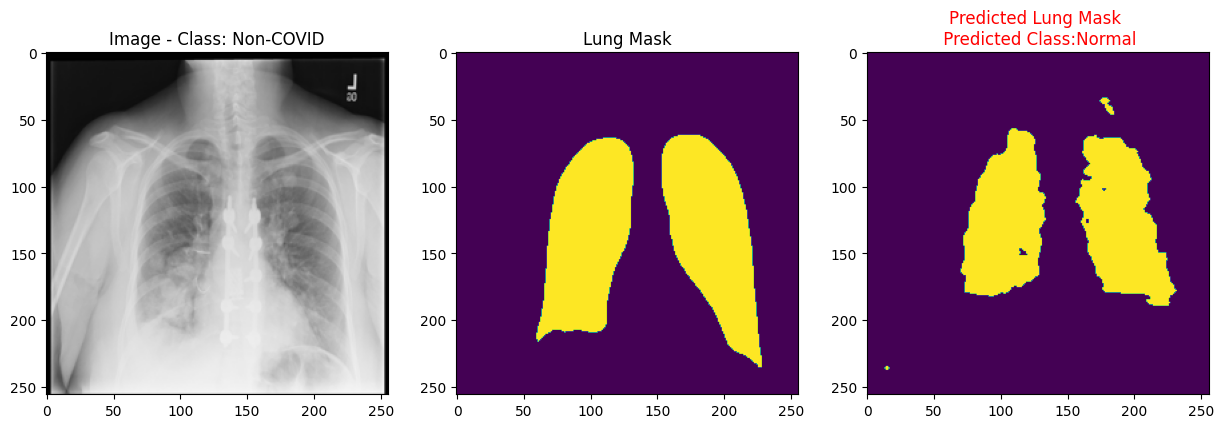

Batch Validation Loss (Segmentation): -49.77131271362305
Batch Validation Loss (Classification): 27.631023406982422
Total Validation Loss: -22.140289306640625
Epoch 1 completed

Epoch 2 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -45.846763610839844
Train Batch Loss (Classification): 19.69719886779785
Total Loss: -26.149564743041992
torch.Size([1, 256, 256])


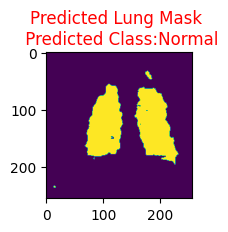

Batch Validation Loss (Segmentation): -47.567054748535156
Batch Validation Loss (Classification): 21.506824493408203
Total Validation Loss: -26.060230255126953
Epoch 2 completed

Epoch 3 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -45.036766052246094
Train Batch Loss (Classification): 16.11809539794922
Total Loss: -28.918670654296875
torch.Size([1, 256, 256])


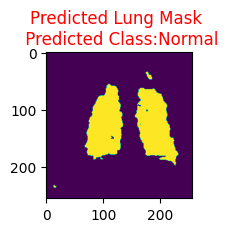

Batch Validation Loss (Segmentation): -47.718711853027344
Batch Validation Loss (Classification): 14.423720359802246
Total Validation Loss: -33.29499053955078
Epoch 3 completed

Epoch 4 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -43.899051666259766
Train Batch Loss (Classification): 9.21034049987793
Total Loss: -34.68871307373047
torch.Size([1, 256, 256])


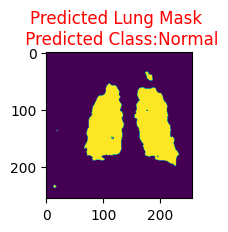

Batch Validation Loss (Segmentation): -64.29043579101562
Batch Validation Loss (Classification): 26.54579734802246
Total Validation Loss: -37.74463653564453
Epoch 4 completed

Epoch 5 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -49.398231506347656
Train Batch Loss (Classification): 18.420682907104492
Total Loss: -30.977548599243164
torch.Size([1, 256, 256])


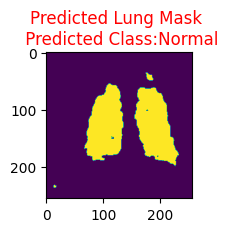

Batch Validation Loss (Segmentation): -50.4394416809082
Batch Validation Loss (Classification): 24.333648681640625
Total Validation Loss: -26.105792999267578
Epoch 5 completed

Epoch 6 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -44.365074157714844
Train Batch Loss (Classification): 8.636448860168457
Total Loss: -35.7286262512207
torch.Size([1, 256, 256])


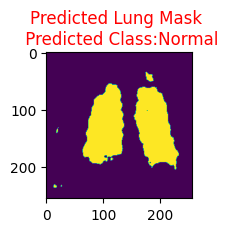

Batch Validation Loss (Segmentation): -45.010704040527344
Batch Validation Loss (Classification): 18.42068099975586
Total Validation Loss: -26.590023040771484
Epoch 6 completed

Epoch 7 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -42.94727325439453
Train Batch Loss (Classification): 18.420682907104492
Total Loss: -24.52659034729004
torch.Size([1, 256, 256])


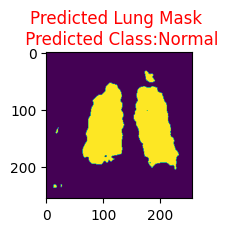

Batch Validation Loss (Segmentation): -50.66320037841797
Batch Validation Loss (Classification): 29.00909996032715
Total Validation Loss: -21.65410041809082
Epoch 7 completed

Epoch 8 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -48.95914840698242
Train Batch Loss (Classification): 24.121501922607422
Total Loss: -24.837646484375
torch.Size([1, 256, 256])


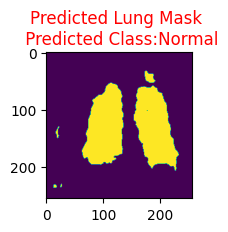

Batch Validation Loss (Segmentation): -55.27397537231445
Batch Validation Loss (Classification): 18.42068099975586
Total Validation Loss: -36.853294372558594
Epoch 8 completed

Epoch 9 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -47.32079315185547
Train Batch Loss (Classification): 26.333646774291992
Total Loss: -20.987146377563477
torch.Size([1, 256, 256])


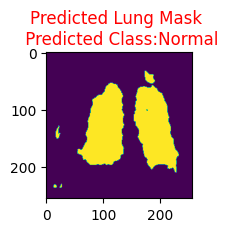

Batch Validation Loss (Segmentation): -47.055572509765625
Batch Validation Loss (Classification): 27.631023406982422
Total Validation Loss: -19.424549102783203
Epoch 9 completed

Epoch 10 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -46.004390716552734
Train Batch Loss (Classification): 6.907755374908447
Total Loss: -39.09663391113281
torch.Size([1, 256, 256])


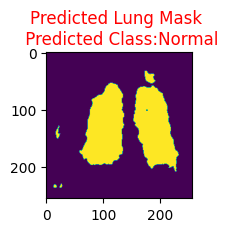

Batch Validation Loss (Segmentation): -59.2674674987793
Batch Validation Loss (Classification): 33.57801818847656
Total Validation Loss: -25.689449310302734
Epoch 10 completed

Epoch 11 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -46.709068298339844
Train Batch Loss (Classification): 17.485048294067383
Total Loss: -29.22402000427246
torch.Size([1, 256, 256])


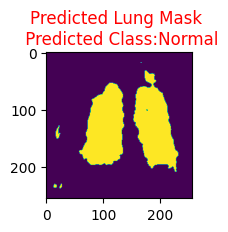

Batch Validation Loss (Segmentation): -51.22210693359375
Batch Validation Loss (Classification): 16.11809539794922
Total Validation Loss: -35.10401153564453
Epoch 11 completed

Epoch 12 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -49.47699737548828
Train Batch Loss (Classification): 6.636449813842773
Total Loss: -42.840545654296875
torch.Size([1, 256, 256])


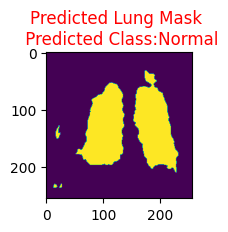

Batch Validation Loss (Segmentation): -48.302215576171875
Batch Validation Loss (Classification): 19.265663146972656
Total Validation Loss: -29.03655242919922
Epoch 12 completed

Epoch 13 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -57.73729705810547
Train Batch Loss (Classification): 8.848599433898926
Total Loss: -48.88869857788086
torch.Size([1, 256, 256])


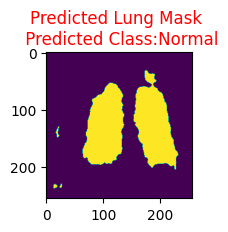

Batch Validation Loss (Segmentation): -54.483367919921875
Batch Validation Loss (Classification): 21.90934944152832
Total Validation Loss: -32.57402038574219
Epoch 13 completed

Epoch 14 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -39.36037063598633
Train Batch Loss (Classification): 6.424299240112305
Total Loss: -32.936073303222656
torch.Size([1, 256, 256])


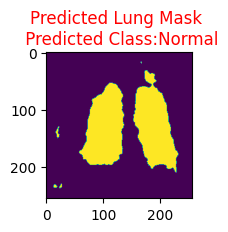

Batch Validation Loss (Segmentation): -59.2288932800293
Batch Validation Loss (Classification): 22.121498107910156
Total Validation Loss: -37.10739517211914
Epoch 14 completed

Epoch 15 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -45.587074279785156
Train Batch Loss (Classification): 23.025854110717773
Total Loss: -22.561220169067383
torch.Size([1, 256, 256])


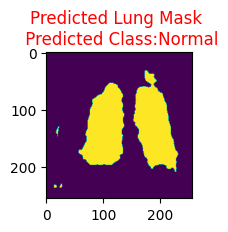

Batch Validation Loss (Segmentation): -53.09881591796875
Batch Validation Loss (Classification): 24.40443992614746
Total Validation Loss: -28.69437599182129
Epoch 15 completed

Epoch 16 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -50.06162643432617
Train Batch Loss (Classification): 25.32843780517578
Total Loss: -24.73318862915039
torch.Size([1, 256, 256])


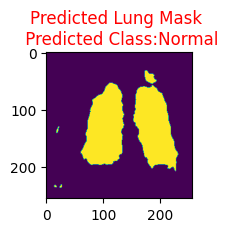

Batch Validation Loss (Segmentation): -55.07520294189453
Batch Validation Loss (Classification): 17.69719886779785
Total Validation Loss: -37.37800598144531
Epoch 16 completed

Epoch 17 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -50.63302230834961
Train Batch Loss (Classification): 18.78900909423828
Total Loss: -31.844013214111328
torch.Size([1, 256, 256])


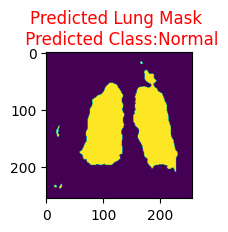

Batch Validation Loss (Segmentation): -49.461456298828125
Batch Validation Loss (Classification): 25.32843780517578
Total Validation Loss: -24.133018493652344
Epoch 17 completed

Epoch 18 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -53.95375442504883
Train Batch Loss (Classification): 26.61015510559082
Total Loss: -27.343599319458008
torch.Size([1, 256, 256])


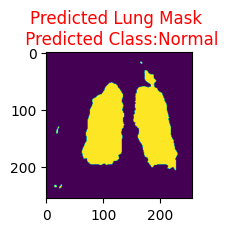

Batch Validation Loss (Segmentation): -58.3848991394043
Batch Validation Loss (Classification): 24.121498107910156
Total Validation Loss: -34.26340103149414
Epoch 18 completed

Epoch 19 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -52.33198928833008
Train Batch Loss (Classification): 17.661006927490234
Total Loss: -34.670982360839844
torch.Size([1, 256, 256])


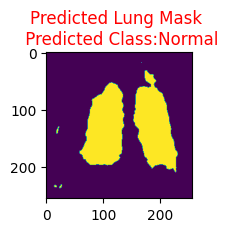

Batch Validation Loss (Segmentation): -56.875091552734375
Batch Validation Loss (Classification): 26.022916793823242
Total Validation Loss: -30.852174758911133
Epoch 19 completed

Epoch 20 started
Batch X: torch.Size([10, 3, 256, 256])
Train Batch Loss (Segmentation): -51.7745246887207
Train Batch Loss (Classification): 22.135581970214844
Total Loss: -29.63894271850586
torch.Size([1, 256, 256])


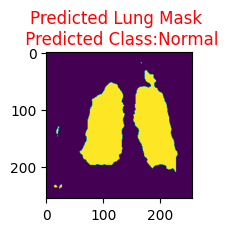

Batch Validation Loss (Segmentation): -60.80173873901367
Batch Validation Loss (Classification): 25.32843780517578
Total Validation Loss: -35.47330093383789
Epoch 20 completed



In [50]:
# Start training
loss_history, val_loss_history = train(model_seg, EPOCHS, BATCH_SIZE, loss_fn, loss_fn_class, optimizer, 'model_cp_examen')

In [51]:
# Change plot darkstyle
plt.style.use('dark_background')

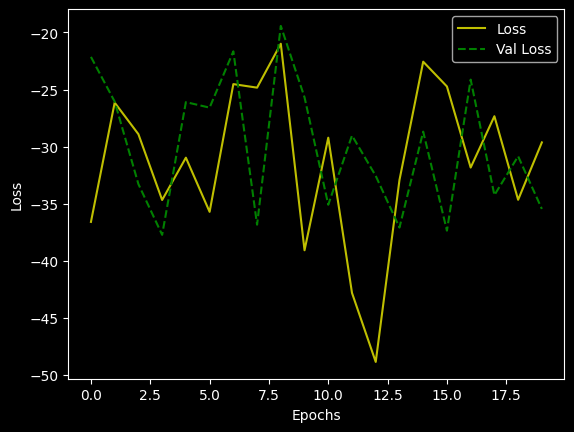

In [52]:
# Plot losses vs epochs
plt.plot(loss_history, 'y')
plt.plot(val_loss_history, 'g--')
plt.legend(['Loss', 'Val Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Test model

In [53]:
data_loader = torch.utils.data.DataLoader(dataset=data_test, batch_size=10, shuffle=True, num_workers=1)

In [61]:
batch_x, batch_y, batch_y_mask = next(iter(data_loader))

In [62]:
torch.cuda.empty_cache()
model_seg.eval()
pred_seg, pred_class = model_seg(batch_x.to(device).to(dtype=torch.float32))

In [63]:
pred_seg.shape, pred_class

(torch.Size([10, 1, 256, 256]),
 tensor([[0.3622, 0.2272, 0.4105],
         [0.3073, 0.3061, 0.3866],
         [0.3209, 0.2469, 0.4322],
         [0.2736, 0.2859, 0.4405],
         [0.3100, 0.1873, 0.5027],
         [0.3205, 0.3446, 0.3350],
         [0.3556, 0.2326, 0.4118],
         [0.3234, 0.2839, 0.3927],
         [0.3709, 0.2618, 0.3674],
         [0.2958, 0.3227, 0.3815]], device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [64]:
_, pred_class = torch.max(pred_class, 1)

In [65]:
pred_class, batch_y

(tensor([2, 2, 2, 2, 2, 1, 2, 2, 0, 2], device='cuda:0'),
 tensor([0, 1, 1, 0, 2, 0, 0, 1, 0, 2]))

In [66]:
THRESHOLD = 0.5

In [67]:
pred_seg = (pred_seg > THRESHOLD)*1

torch.Size([3, 256, 256])
torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


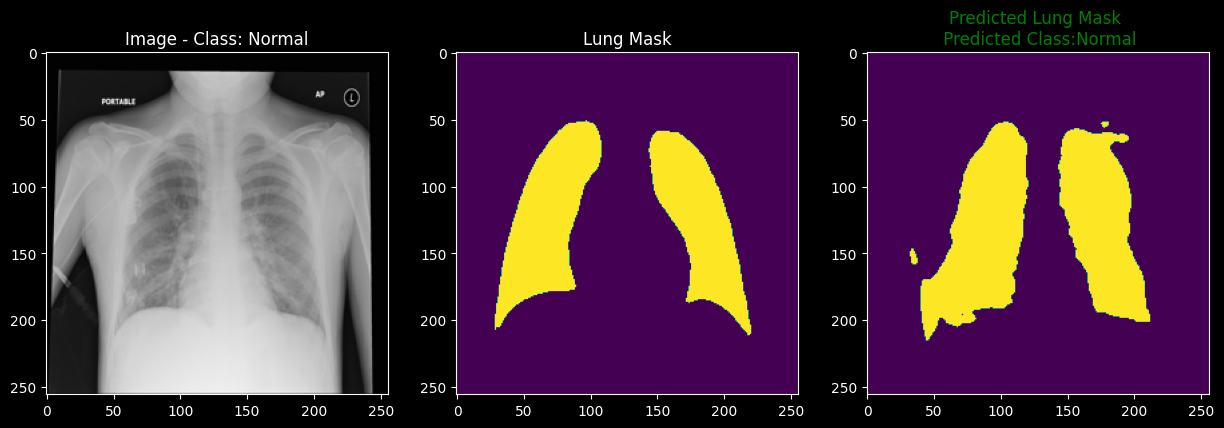

In [68]:
plt.figure(figsize=(15, 8))

img = batch_x[4]
plt.subplot(1, 3, 1)
print(img.shape)
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Image - Class: {data_test.classes[batch_y[4]]}")

img = batch_y_mask[4]
plt.subplot(1, 3, 2)
print(img.shape)
plt.imshow(img.cpu().detach().permute(1, 2, 0))
plt.title("Lung Mask")

img = pred_seg[4]
#img = (img > THRESHOLD)*1
plt.subplot(1, 3, 3)
print(img.shape)
plt.imshow(img.cpu().detach().permute(1, 2, 0))
plt.title(f"Predicted Lung Mask \n Predicted Class:{data_test.classes[pred_class[4]]}",
          color='green' if data_test.classes[pred_class[4]] == data_test.classes[batch_y[4]] else 'red')

# color title

plt.show()

### Metrics


In [69]:
# Accuracy for segmentation pixel by pixel
total_pixels = pred_seg.shape[2]*pred_seg.shape[3]
batch_score = 0
for i in range(pred_seg.shape[0]):
    score = torch.sum((pred_seg[i].to('cpu') == batch_y_mask[i])*1)/total_pixels
    batch_score += score
    print(f"{WHITE}Sample Accuracy Score: {YELLOW}{score*100:.2f}%{RESET}")

batch_score /= pred_seg.shape[0]
print(f"{YELLOW}Batch Accuracy Score: {YELLOW}{batch_score*100:.2f}%{RESET}")

Sample Accuracy Score: 73.93%
Sample Accuracy Score: 68.85%
Sample Accuracy Score: 70.15%
Sample Accuracy Score: 69.94%
Sample Accuracy Score: 73.73%
Sample Accuracy Score: 52.10%
Sample Accuracy Score: 59.87%
Sample Accuracy Score: 60.46%
Sample Accuracy Score: 62.37%
Sample Accuracy Score: 41.42%
Batch Accuracy Score: 63.28%


Segmentation accuracy is commonly ~50%, after aroun 20-30 epochs. Current is ~60%.

In [70]:
# Accuracy for classification
total_samples = pred_seg.shape[0]
batch_score = 0
for i in range(total_samples):
    score = int((pred_class[i].to('cpu') == batch_y[i])*1)
    batch_score += score
    print(f"{WHITE}Sample Accuracy Score: {YELLOW}{score*100:.2f}%{RESET}")

batch_score /= total_samples
print(f"{YELLOW}Batch Accuracy Score: {YELLOW}{batch_score*100:.2f}%{RESET}")

Sample Accuracy Score: 0.00%
Sample Accuracy Score: 0.00%
Sample Accuracy Score: 0.00%
Sample Accuracy Score: 0.00%
Sample Accuracy Score: 100.00%
Sample Accuracy Score: 0.00%
Sample Accuracy Score: 0.00%
Sample Accuracy Score: 0.00%
Sample Accuracy Score: 100.00%
Sample Accuracy Score: 100.00%
Batch Accuracy Score: 30.00%


Classification accuracy was highest ~50%, lowest ~20%, and current ~30%.